In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("dataWithSomeReformatting.xlsx", index_col = [0])
data.rename(columns={key: str(key).replace("_", " ").title() for key in data}, inplace= True)
data["General Outcome"][data["Environmental Outcome"]==1]=1
data["General Outcome"][data["Health Outcome"]==1]=1
keys = list(data.keys())
list(data.keys())

C:\Users\JLCat\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
C:\Users\JLCat\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


['Article Title',
 'Article Link',
 'General Outcome',
 'General Outcome (1,0)',
 'Desc General Outcome',
 'Daily Intake',
 'Descr Daily Intake',
 'Health Outcome',
 'Descr Health Outcome',
 'Environmental Outcome',
 'Descr Environmental Outcome',
 'Fund Source',
 'Fund Source',
 'Author Affiliation',
 'Loc Authors',
 'Loc Experiment',
 'Year',
 'Journal',
 'Loc Journal',
 'Loc Editor Journal',
 'Current Impact Factor',
 'Impact F Publishing Year',
 'Num Citations',
 'Public',
 'Private',
 'University',
 'International',
 'Research',
 'Republic Of Korea',
 'Ireland',
 'Nigeria',
 'Denmark',
 'Austria',
 'Canada',
 'Switzerland',
 'Portugal',
 'Poland',
 'Norway',
 'South Africa',
 'Egypt',
 'Iran',
 'Cameroon',
 'New Zealand',
 'Belgium',
 'Greece',
 'Latvia',
 'Netherlands',
 'Hungary',
 'Tunisia',
 'Sri Lanka',
 'Colombia',
 'Slovak Republic',
 'Slovenia',
 'Finland',
 'Usa',
 'China',
 'Germany',
 'Taiwan',
 'Japan',
 'Italy',
 'Brazil',
 'Romania',
 'Morocco',
 'France',
 'Mexico',

In [3]:
years = keys[-31:]
countries = keys[-82:-31]
data.rename(columns = {year:str(year) for year in years}, inplace = True)
years = [str(year) for year in years]
data

,Article Title,Article Link,General Outcome,"General Outcome (1,0)",Desc General Outcome,Daily Intake,Descr Daily Intake,Health Outcome,Descr Health Outcome,Environmental Outcome,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Potential of terracing to reduce glyphosate an...,https://link.springer.com/article/10.1007%2Fs1...,1,1,Found glyphosate in soil and sediment,NaN,NaN,0,NaN,1,...,0,0,0,0,0,0,0,1,0,0
1,Uptake and persistence of the herbicide glyph...,https://cdnsciencepub.com/doi/abs/10.1139/x89-128,1,1,High glyphosate levels above maximum permissib...,NaN,NaN,0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
2,Residues of glyphosate and its metabolite AMPA...,https://cdnsciencepub.com/doi/pdf/10.4141/cjps...,0,0,Accepted seed residues of less than 5.0 mg kg-...,NaN,NaN,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,Glyphosate pathways to modern diseases VI: Pri...,http://www.amsi.ge/jbpc/11717/25SA16A.pdf,1,1,Health risks associated with the indiscrimina...,NaN,NaN,1,"Health risk, presence of glyphosate in many po...",0,...,0,0,0,0,0,1,0,0,0,0
4,A generational study of glyphosate-tolerant so...,https://doi.org/10.1016/j.fct.2003.08.003,0,0,It was concluded that the transgenic soybean ...,NaN,NaN,0,No negative effect,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,Effect of glyphosate herbicide on acetylcholin...,https://doi.org/10.1016/j.ecoenv.2005.07.017,1,1,The present study reveals that exposure of L. ...,NaN,NaN,0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
499,Comparative cyto- and genotoxicity assessment ...,https://doi.org/10.1016/j.envres.2019.108851,1,1,the GBHs-induced DNA damage observed in the co...,NaN,NaN,1,the GBHs-induced DNA damage observed in the co...,0,...,0,0,0,0,0,0,0,1,0,0
500,Genotoxic effects of glyphosate on Physalaemus...,https://doi.org/10.1016/j.etap.2020.103516,1,1,Glyphosate herbicide can be considered a genot...,NaN,NaN,1,Glyphosate herbicide can be considered a genot...,0,...,0,0,0,0,0,0,0,0,0,1
501,Ecotoxicological risk assessment for the herbi...,https://doi.org/10.1016/j.envpol.2017.10.100,1,1,Potential adverse effect on aquatic invertebrates,NaN,NaN,0,NaN,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
### drop Iran due to colinearity
#del years[0]
keys =["General Outcome",
       #"Health Outcome",
       #"Environmental Outcome",
       'Num Citations',
       'Public',
       'Private',
       'University',
       'International',
       'Research',
       "Impact F Publishing Year"]
keys = keys #+ countries
#keys = ["General_outcome", "Year", "Fund_Source", "Loc_experiment", "Journal"]
max_cond_vars = len(keys) - 2
data = data[keys + countries].dropna()
data["Impact F Publishing Year"].replace("None",0, inplace=True)
data["Impact F Publishing Year"] = data["Impact F Publishing Year"].astype(float)
data.dtypes

General Outcome               int64
Num Citations               float64
Public                        int64
Private                       int64
University                    int64
International                 int64
Research                      int64
Impact F Publishing Year    float64
Republic Of Korea             int64
Ireland                       int64
Nigeria                       int64
Denmark                       int64
Austria                       int64
Canada                        int64
Switzerland                   int64
Portugal                      int64
Poland                        int64
Norway                        int64
South Africa                  int64
Egypt                         int64
Iran                          int64
Cameroon                      int64
New Zealand                   int64
Belgium                       int64
Greece                        int64
Latvia                        int64
Netherlands                   int64
Hungary                     

In [5]:
list(data["Impact F Publishing Year"])

[2.79,
 2.95,
 2.662,
 1.559,
 1.78,
 2.24,
 0.0,
 0.634,
 1.196,
 0.737,
 1.72,
 0.55,
 3.171,
 2.005,
 2.631,
 2.14,
 2.136,
 0.636,
 3.713,
 4.587,
 1.224,
 2.886,
 2.456,
 1.777,
 0.518,
 2.609,
 4.377,
 0.744,
 0.0,
 3.179,
 2.657,
 2.667,
 4.872,
 0.613,
 1.502,
 0.552,
 0.552,
 0.793,
 2.806,
 3.687,
 1.721,
 4.872,
 0.388,
 0.738,
 2.322,
 1.01,
 1.196,
 1.383,
 3.129,
 0.813,
 7.028,
 0.507,
 4.71,
 1.437,
 0.903,
 0.35,
 0.53,
 0.52,
 4.052,
 1.437,
 3.636,
 1.9,
 1.5,
 2.506,
 0.636,
 2.782,
 0.636,
 2.191,
 3.526,
 1.437,
 3.526,
 3.516,
 2.997,
 0.0,
 0.341,
 0.0,
 1.33,
 1.452,
 1.452,
 0.0,
 3.185,
 3.119,
 3.325,
 1.224,
 3.334,
 3.334,
 2.21,
 1.9,
 3.908,
 1.259,
 3.381,
 1.057,
 1.057,
 0.0,
 1.057,
 2.214,
 0.0,
 0.0,
 0.0,
 3.998,
 0.624,
 1.9,
 7.943,
 0.434,
 4.052,
 2.79,
 0.434,
 0.441,
 0.688,
 0.949,
 1.98,
 3.498,
 0.688,
 3.025,
 2.996,
 0.688,
 1.108,
 0.709,
 4.872,
 1.259,
 3.088,
 1.748,
 2.294,
 2.762,
 3.526,
 3.871,
 2.682,
 3.514,
 1.785,
 0.0,
 3.8

In [6]:
import pingouin

def pcorr_by_entity(data, keys, entities, sig = .05):

    pcorr_dct = {}
    p_val_dct = {}
    for entity in entities:
        p_val_dct[entity] = {}
        pcorr_dct[entity] = {}
        for key in keys:
            pcorr_df = data[keys + [entity]]
            x, y = entity, key
            other_vars = [z for z in pcorr_df.keys() if z != x and z != y ]
            try:
                stats = pingouin.partial_corr(data=pcorr_df, x = x, y = y, covars=other_vars)
                p_val_dct[entity][key] = stats["p-val"].values[0]

    #             stats["p-val"].values[0] <= sig:
                pcorr_dct[entity][key] = pcorr_df.pcorr()[entity][key]
            except:
                p_val_dct[entity][key] = np.nan
                pcorr_dct[entity][key] = np.nan

    p_val_df = pd.DataFrame(p_val_dct).T
    pcorr_df = pd.DataFrame(pcorr_dct).T
    return pcorr_df, p_val_df
sig = .1
pcorr_df, p_val_df = pcorr_by_entity(data, keys, countries, sig = sig)
# for country in countries:
#     for key in keys:
#         if p_val_dct[country][key] > sig:
#             pcorr_df[key][country] = np.nan

pcorr_df

C:\Users\JLCat\AppData\Roaming\Python\Python38\site-packages\pingouin\correlation.py:838: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\JLCat\AppData\Roaming\Python\Python38\site-packages\pingouin\correlation.py:839: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\JLCat\AppData\Roaming\Python\Python38\site-packages\pingouin\correlation.py:848: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.abs(Vi_diag - Vi ** 2 / Vi_diag[..., None])).T
C:\Users\JLCat\AppData\Roaming\Python\Python38\site-packages\pingouin\correlation.py:929: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / np.diag(Vi)))
C:\Users\JLCat\AppData\Roaming\Python\Python38\site-packages\pingouin\correlation.py:930: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\JLCat\AppData\

,General Outcome,Num Citations,Public,Private,University,International,Research,Impact F Publishing Year
Republic Of Korea,0.023098,0.008991,0.025455,-0.016885,-0.030496,-0.006896,-0.004115,0.013120
Ireland,-0.072702,-0.037789,0.049060,0.137365,0.002332,-0.001721,0.002145,0.046701
Nigeria,0.043839,-0.026216,-0.103816,-0.048205,-0.071804,-0.025126,-0.017939,-0.087805
Denmark,-0.119395,0.012788,0.008521,0.018816,-0.044129,-0.016415,-0.011165,-0.037288
Austria,-0.058667,0.017045,-0.041904,-0.047841,-0.004294,-0.030129,-0.012808,0.058054
Canada,-0.166742,0.035513,0.132819,0.039204,0.008979,0.033993,-0.014257,-0.006971
Switzerland,-0.178756,-0.002579,0.035286,-0.054228,-0.054620,-0.025983,-0.013272,0.018020
Portugal,-0.014738,-0.002824,0.078629,-0.014008,-0.005488,0.239506,-0.002642,-0.031553
Poland,-0.026060,-0.047663,0.008169,-0.057611,0.015799,-0.036815,-0.016027,0.048305
Norway,0.023005,0.051564,0.029859,-0.020245,-0.030351,-0.003189,-0.004506,-0.016437


In [7]:
plot_df = pcorr_df.dropna()
plot_pvals_df = p_val_df.dropna()

sig_vals = [.1, .05, .01]
for key in plot_df:
    plot_df[key] = plot_df[key].round(3).astype(str)
    #plot_pvals_df[key] = plot_pvals_df[key].astype(str)
    for ix in plot_df.index:
        value = plot_df.loc[ix, key]
        p_val = plot_pvals_df.loc[ix, key]
        for sig_val in sig_vals:
            if p_val < sig_val: 
                plot_df.loc[ix,key] = plot_df.loc[ix, key] + "*"

plot_df

<ipython-input-7-832c9914691b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df[key] = plot_df[key].round(3).astype(str)
C:\Users\JLCat\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,General Outcome,Num Citations,Public,Private,University,International,Research,Impact F Publishing Year
Republic Of Korea,0.023,0.009,0.025,-0.017,-0.03,-0.007,-0.004,0.013
Ireland,-0.073*,-0.038,0.049,0.137***,0.002,-0.002,0.002,0.047
Nigeria,0.044,-0.026,-0.104**,-0.048,-0.072,-0.025,-0.018,-0.088**
Denmark,-0.119***,0.013,0.009,0.019,-0.044,-0.016,-0.011,-0.037
Austria,-0.059,0.017,-0.042,-0.048,-0.004,-0.03,-0.013,0.058
Canada,-0.167***,0.036,0.133**,0.039,0.009,0.034,-0.014,-0.007
Switzerland,-0.179***,-0.003,0.035,-0.054,-0.055,-0.026,-0.013,0.018
Portugal,-0.015,-0.003,0.079,-0.014,-0.005,0.24***,-0.003,-0.032
Poland,-0.026,-0.048,0.008,-0.058,0.016,-0.037,-0.016,0.048
Norway,0.023,0.052,0.03,-0.02,-0.03,-0.003,-0.005,-0.016


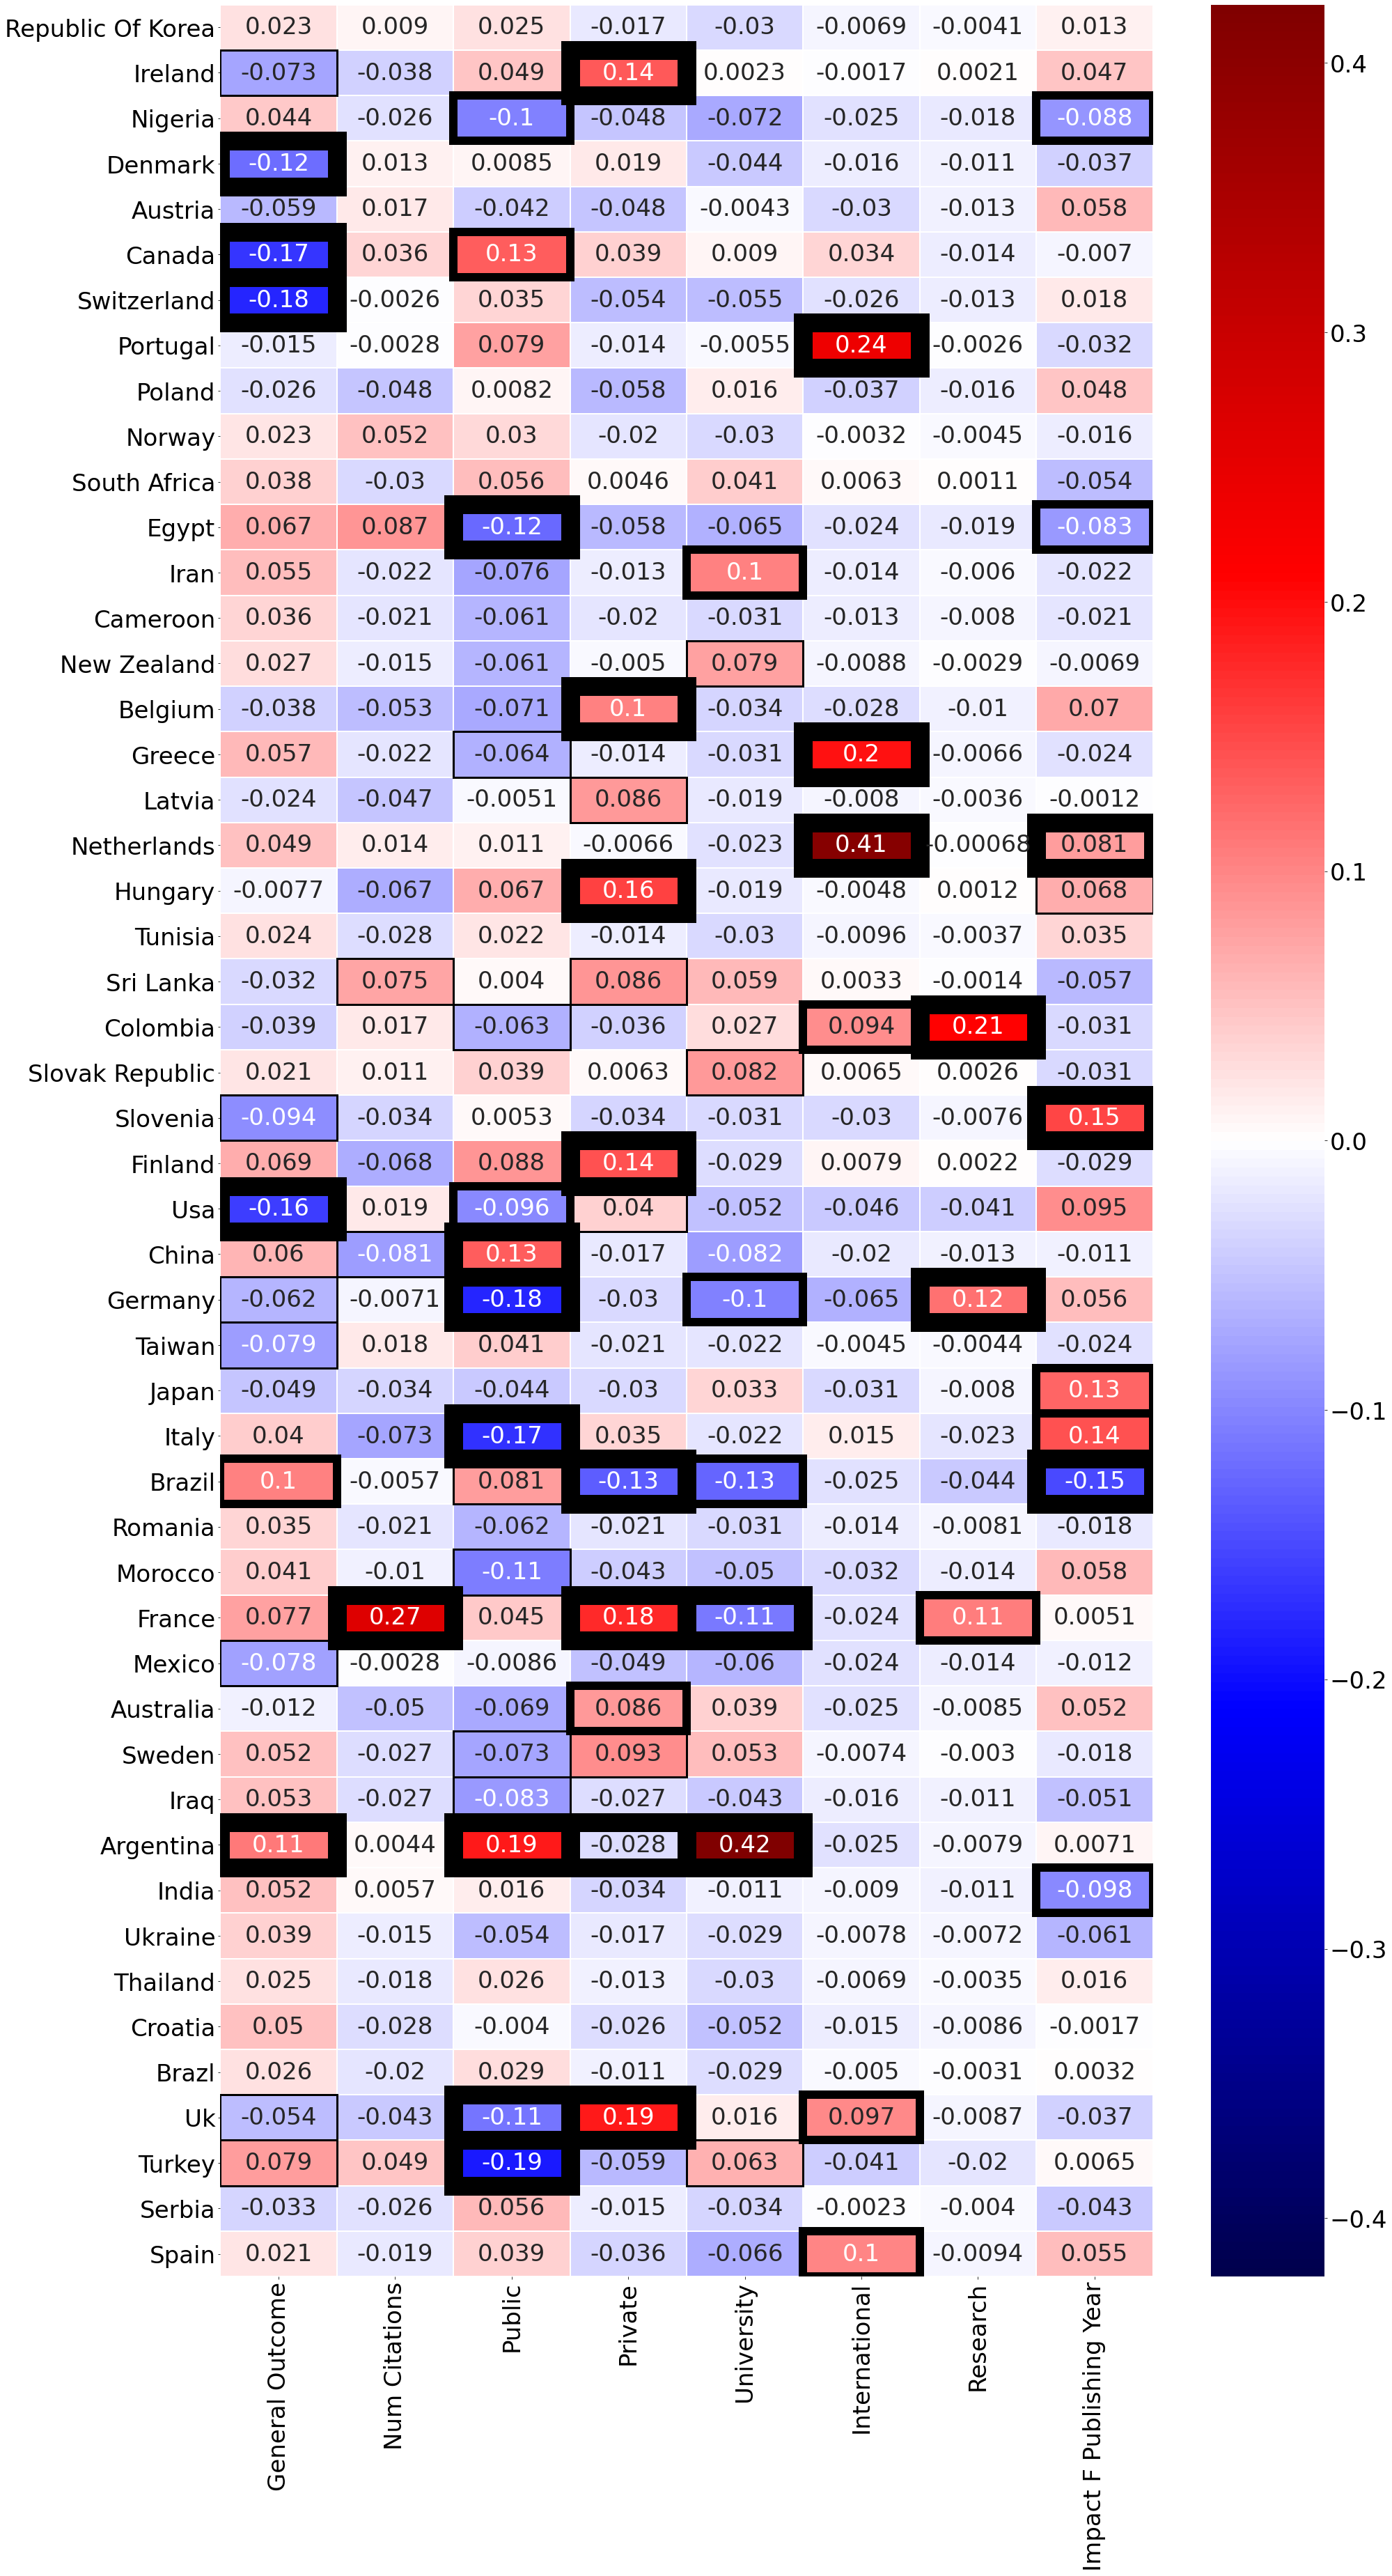

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from matplotlib.patches import Rectangle
plot_df = pcorr_df.dropna()

plt.rcParams.update({'font.size': 34}) 

# pcorr_df.style.use(p_val_df.style.applymap(bold_sig).export())
fig, ax = plt.subplots(figsize = (30,60))
mx = np.abs(pcorr_df.max().max())
mn = np.abs(pcorr_df.min().min())
max_val = max([mx,mn])
min_val = max_val * -1
countries = plot_df.index
mp = sn.heatmap(plot_df, annot = True, linewidth=1,cmap = "seismic", ax=ax, vmin=min_val, vmax=max_val)
for i in range(len(keys)):
    for j in range(len(countries)):
        key = keys[i]
        country = countries[j]
        p_val = p_val_df.loc[country][key]
        lw = 0
        for k in range(len(sig_vals)):
            sig_val = sig_vals[k]
            if p_val <= sig_val:
                lw = 3 * (k + 1) ** 2
#         anchor = (lw / 2, lw / 2)
        mp.add_patch(Rectangle((i, j), 1, 1, fill=False, edgecolor='k', lw=lw))
plt.show()
# pcorr_df[p_val_df["General Outcome"] < sig]#.style.apply(highlight)
# pcorrsig[p_val_df["General Outcome"] < sig].to_csv("StatisticallySignificantOutcomesbyCountry.csv")
# p_val_df[p_val_df["General Outcome"] < sig].to_csv("StatisticalSignificancebyCountry.csv")

In [9]:
pcorr_df = pcorr_df.append(pd.DataFrame(pcorr_df.mean()).rename(columns = {0:"Mean"}).T)


In [10]:
from pgmpy.estimators import PC
c = PC(data[keys].dropna())
max_cond_vars = len(keys) - 2

sig =0.05
model = c.estimate(return_type = "dag", variant= "parallel", 
                   significance_level = sig, 
                   max_cond_vars = max_cond_vars, ci_test = "pearsonr")
edges = model.edges()
pcorr = data.pcorr()
weights = {}

Working for n conditional variables: 5:  83%|████████████████████████████████████▋       | 5/6 [00:00<00:00, 12.79it/s]


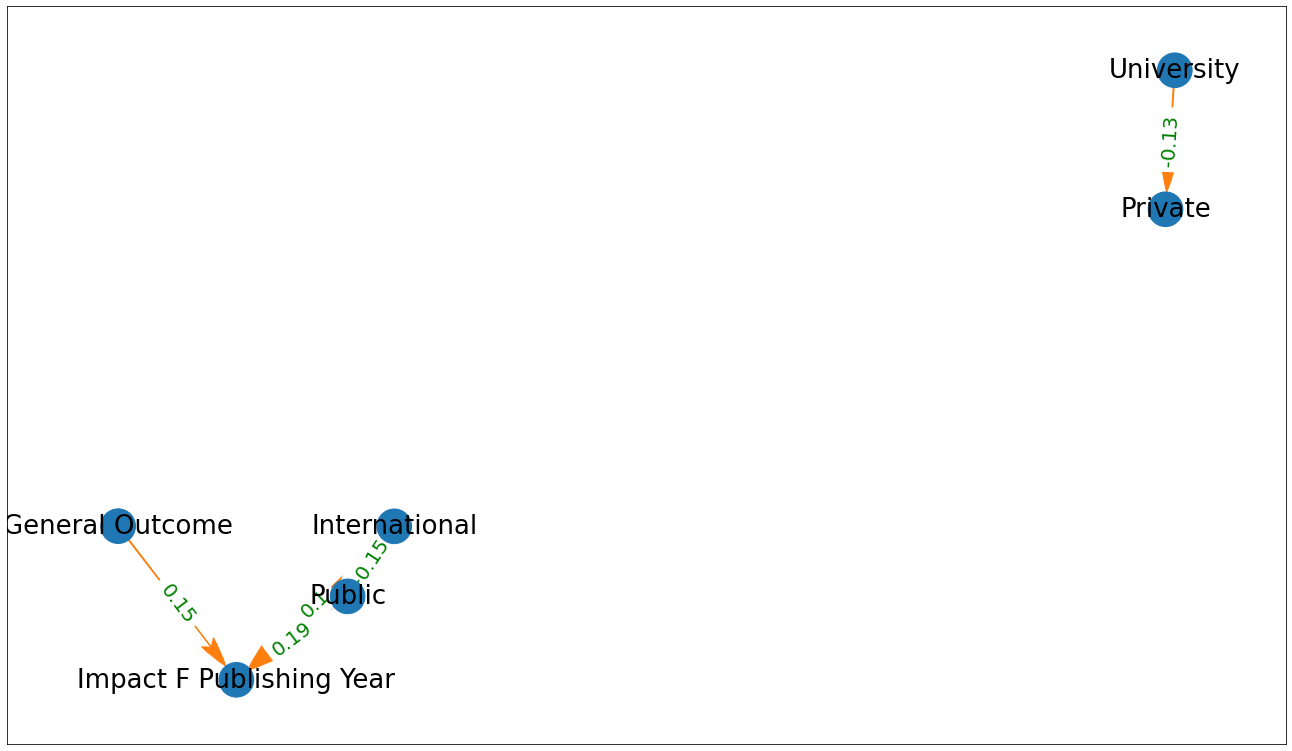

In [11]:
from matplotlib.patches import ArrowStyle
import networkx as nx
def graph_DAG(edges, df, title = ""):
    pcorr = df.pcorr()
    graph = nx.DiGraph()
    edge_labels = {}
    for edge in edges:
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
        
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     font_color = "black",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20)

graph_DAG(edges, data)
    

In [12]:
def gen_pcorr(df, method = "pearson", sig = 0.01):
    # Correlation type:
    # 'pearson': Pearson r product-moment correlation
    # 'spearman': Spearman ρ rank-order correlation
    # 'kendall': Kendall’s τB correlation (for ordinal data)
    # 'bicor': Biweight midcorrelation (robust)
    # 'percbend': Percentage bend correlation (robust)
    # 'shepherd': Shepherd’s pi correlation (robust)
    # 'skipped': Skipped correlation (robust)
    pcs_dct = {}
    sig_corr_dct = {}
    for x in df.keys():
        sig_corr_dct[x] = []
        pcs_dct[x]={}
        for y in df.keys():
            # control variables
            # select variables that are not x or y
            other_vars = [z for z in df.keys() if z != y and z != x ]
            if x == y:
                # No need to calculate if the variable is itself
                pcs_dct[x][y] = 1
            else:
                pcs_dct[x][y] = df.partial_corr(x=x,y=y, covar=other_vars,
                                      method=method).round(3)
                if pcs_dct[x][y]["p-val"].values[0] < sig:
                    sig_corr_dct[x].append((y, pcs_dct[x][y]["r"].values[0]))

    return pcs_dct, sig_corr_dct

In [37]:
pcs_dct, sig_corr_dct = gen_pcorr(data[keys].fillna(0), method = "pearson", sig = 0.01)



import statsmodels.api as sm
import numpy
residuals = {}
partial_corr = {}
reg_df = data[keys].dropna()[:-1]
for y_var in keys:
    X_vars = [x for x in keys if x != y_var]
    X= reg_df[X_vars]
    X["constant"] = 1
    y = reg_df[y_var]
    model = sm.OLS(y,X)
    results = model.fit()
    print(results.summary())
    predict = results.predict()
    reg_df["predict"] = predict
    residuals[y_var] = results.resid 

res_corr_df = pd.DataFrame(residuals).corr()
res_corr_df.sort_index(axis=0, ascending=True).sort_index(axis=1, ascending = True) 
# for x in keys:
#     partial_corr[x] = {}
#     for y in keys:
#         if x != y:
#             Y = pd.DataFrame(residuals[y])
#             X = pd.DataFrame(residuals[x])
#             model = sm.OLS(Y,X)
#             results = model.fit()
#             print(results.rsquared, results.pvalues)
            
#             # check if statsmodels is correctly calcualting the error term... May be negative
#             partial_corr[x][y] = np.corrcoef(residuals[x], residuals[y])[0][1]
# #             print(partial_corr[x][y])
# #             print(pcs_dct[x][y])
#         else:
#             partial_corr[x][y] = 1

                            OLS Regression Results                            
Dep. Variable:        General Outcome   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.100
Date:                Fri, 24 Sep 2021   Prob (F-statistic):             0.0422
Time:                        12:04:29   Log-Likelihood:                -274.57
No. Observations:                 475   AIC:                             565.1
Df Residuals:                     467   BIC:                             598.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Num Citations           

<ipython-input-37-a0ae422c34a8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["constant"] = 1
<ipython-input-37-a0ae422c34a8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["constant"] = 1
<ipython-input-37-a0ae422c34a8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,General Outcome,Impact F Publishing Year,International,Num Citations,Private,Public,Research,University
General Outcome,1.000000,-0.091786,0.042288,-0.062449,0.083917,-0.047799,0.013178,-0.052729
Impact F Publishing Year,-0.091786,1.000000,-0.145127,-0.090108,-0.107535,-0.206789,-0.022814,-0.054256
International,0.042288,-0.145127,1.000000,-0.001251,0.093667,0.151165,0.027475,0.070568
Num Citations,-0.062449,-0.090108,-0.001251,1.000000,-0.152280,-0.025146,-0.024312,-0.031762
Private,0.083917,-0.107535,0.093667,-0.152280,1.000000,0.154522,0.048557,0.173889
Public,-0.047799,-0.206789,0.151165,-0.025146,0.154522,1.000000,0.061645,0.049186
Research,0.013178,-0.022814,0.027475,-0.024312,0.048557,0.061645,1.000000,0.052816
University,-0.052729,-0.054256,0.070568,-0.031762,0.173889,0.049186,0.052816,1.000000


In [56]:

import numpy as np
from scipy import stats, linalg
def partial_corr(C):
    """
    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
    for the remaining variables in C.
    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable
    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
        for the remaining variables in C.
    """
    
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
        
    return P_corr
p_df = reg_df[keys]
p_df["constant"] = 1
pd.DataFrame(partial_corr(p_df.values), columns = p_df.keys(), index = p_df.keys()).sort_index(axis=1, ascending = True).sort_index(axis=0, ascending = True)

<ipython-input-56-f608d66db934>:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  P_corr = np.zeros((p, p), dtype=np.float)
<ipython-input-56-f608d66db934>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.ones(p, dtype=np.bool)


,General Outcome,Impact F Publishing Year,International,Num Citations,Private,Public,Research,University,constant
General Outcome,1.000000,0.091786,-0.042288,0.062449,-0.083917,0.047799,-0.013178,0.052729,0.496328
Impact F Publishing Year,0.091786,1.000000,0.145127,0.090108,0.107535,0.206789,0.022814,0.054256,0.374588
International,-0.042288,0.145127,1.000000,0.001251,-0.093667,-0.151165,-0.027475,-0.070568,0.090743
Num Citations,0.062449,0.090108,0.001251,1.000000,0.152280,0.025146,0.024312,0.031762,0.076146
Private,-0.083917,0.107535,-0.093667,0.152280,1.000000,-0.154522,-0.048557,-0.173889,0.185315
Public,0.047799,0.206789,-0.151165,0.025146,-0.154522,1.000000,-0.061645,-0.049186,0.355549
Research,-0.013178,0.022814,-0.027475,0.024312,-0.048557,-0.061645,1.000000,-0.052816,0.063122
University,0.052729,0.054256,-0.070568,0.031762,-0.173889,-0.049186,-0.052816,1.000000,0.170777
constant,0.496328,0.374588,0.090743,0.076146,0.185315,0.355549,0.063122,0.170777,1.000000


In [38]:
reg_df[keys].pcorr().sort_index(axis=0, ascending=True).sort_index(axis=1, ascending = True)

,General Outcome,Impact F Publishing Year,International,Num Citations,Private,Public,Research,University
General Outcome,1.000000,0.091786,-0.042288,0.062449,-0.083917,0.047799,-0.013178,0.052729
Impact F Publishing Year,0.091786,1.000000,0.145127,0.090108,0.107535,0.206789,0.022814,0.054256
International,-0.042288,0.145127,1.000000,0.001251,-0.093667,-0.151165,-0.027475,-0.070568
Num Citations,0.062449,0.090108,0.001251,1.000000,0.152280,0.025146,0.024312,0.031762
Private,-0.083917,0.107535,-0.093667,0.152280,1.000000,-0.154522,-0.048557,-0.173889
Public,0.047799,0.206789,-0.151165,0.025146,-0.154522,1.000000,-0.061645,-0.049186
Research,-0.013178,0.022814,-0.027475,0.024312,-0.048557,-0.061645,1.000000,-0.052816
University,0.052729,0.054256,-0.070568,0.031762,-0.173889,-0.049186,-0.052816,1.000000
